# 📌 파이썬 머신러닝 완벽 가이드 - 회귀

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

## 1.회귀 소개

## 2.단순 선형 회귀를 통한 회귀 이해

### 2.1 단순 선형 회귀 그래프 그리기

In [5]:
global_font = {'family': 'AppleGothic', 'size' : 10, 'weight': 'bold'}

# 폰트 설정
mpl.rc('font', **global_font)

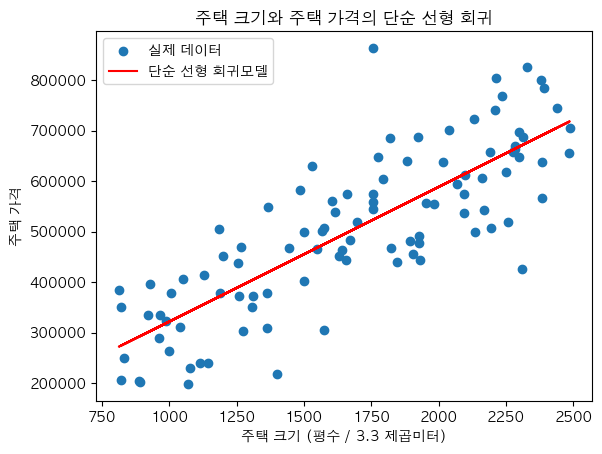

In [7]:
# 주택 크기, 주택 가격 변수 생성
np.random.seed(42)  # 랜덤 시드 고정
house_size = np.random.randint(800, 2500, 100)
house_price = 300 * house_size + np.random.normal(0, 100000, 100)

# 단순 선형 회귀 모델
slope, intercept = np.polyfit(house_size, house_price, 1)
regression_line = slope * house_size + intercept

# 그래프 그리기
plt.scatter(house_size, house_price, label='실제 데이터')
plt.plot(house_size, regression_line, color='red', label='단순 선형 회귀모델')
plt.xlabel('주택 크기 (평수 / 3.3 제곱미터)')
plt.ylabel('주택 가격')
plt.legend()
plt.title('주택 크기와 주택 가격의 단순 선형 회귀')
plt.show()

## 3.비용 최소화하기 - 경사하강법(Gradient Descent) 소개

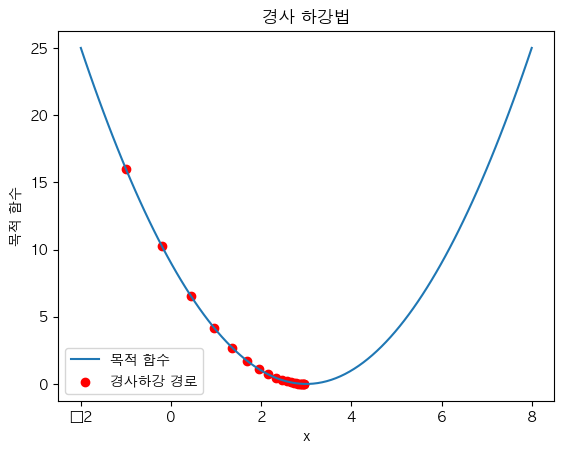

In [15]:
# 간단한 예제 함수: y = (x-3)^2 + 5
def objective_function(x):
    return (x - 3)** 2

# 함수의 도함수(gradient): y' = 2 * (x - 3)
def gradient(x):
    return 2 * (x - 3)

# 경사하강법 함수
def gradient_descent(learning_rate, initial_x, num_iterations):
    x_values = [initial_x]
    for _ in range(num_iterations):
        gradient_value = gradient(x_values[-1])
        new_x = x_values[-1] - learning_rate * gradient_value
        x_values.append(new_x)
    return x_values

# 그래프 생성
def plot_gradient_descent(learning_rate, initial_x, num_iterations):
    x_values = np.linspace(-2, 8, 100)
    y_values = objective_function(x_values)

    plt.plot(x_values, y_values, label='목적 함수')
    
    x_optimal = gradient_descent(learning_rate, initial_x, num_iterations)
    y_optimal = [objective_function(x) for x in x_optimal]

    plt.scatter(x_optimal, y_optimal, color='red', label='경사하강 경로')
    plt.title('경사 하강법')
    plt.xlabel('x')
    plt.ylabel('목적 함수')
    plt.legend()
    plt.show()

# 경사하강법 그래프 플로팅
learning_rate = 0.1
initial_x = -1
num_iterations = 20
plot_gradient_descent(learning_rate, initial_x, num_iterations)

## 4.사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### 4.1 데이터 불러오기

In [ ]:
from sklearn.datasets import load_boston

# 데이터 셋 로드
boston = load_boston()

# boston 데이터 셋 DataFrame 변환
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

# boston 데이터 셋의 target 배열은 주택가격으로 "PRICE" 컬럼 추가
boston_df["PRICE"] = boston.target
print("Boston 데이터 셋 크기 : ", boston_df.shape)
boston_df.head()

In [20]:
boston_df = pd.read_csv("./boston.csv")

boston_df = boston_df.rename(columns={"MEDV":"PRICE"})
print("Boston 데이터 셋 크기 : ", boston_df.shape)
boston_df.head()

Boston 데이터 셋 크기 :  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 4.2 독립변수와 종속변수 간의 상관관계 시각화

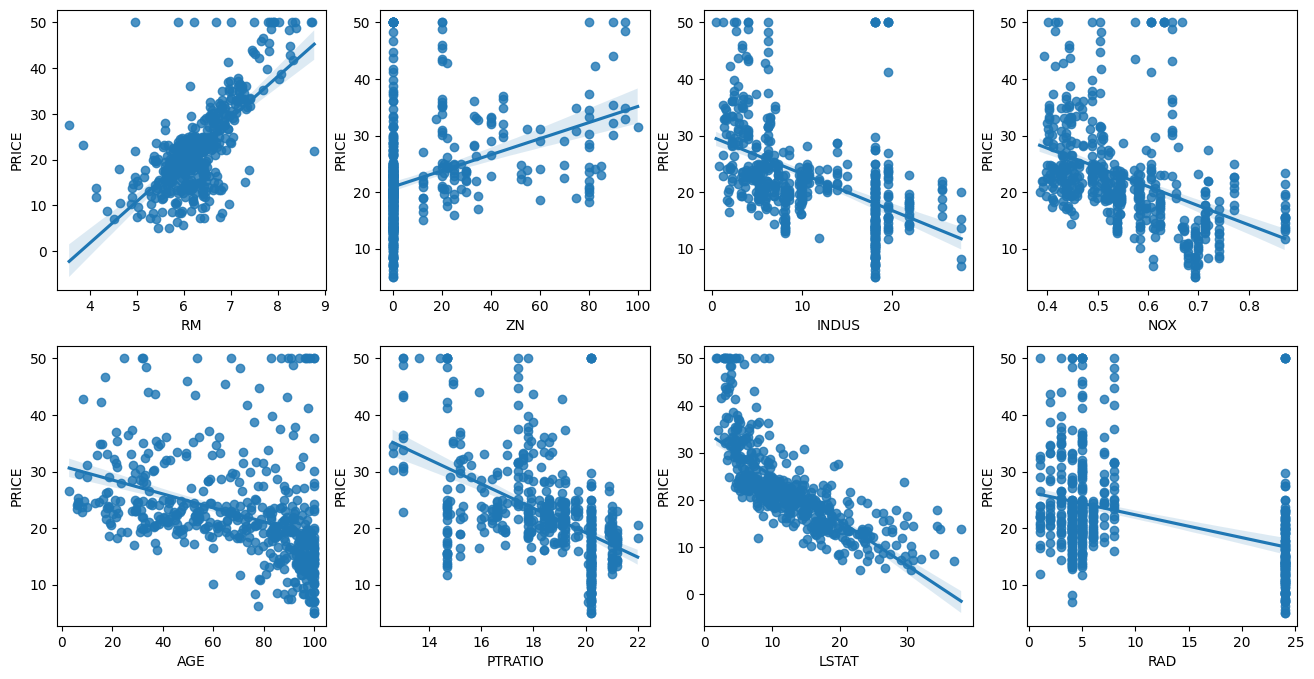

In [21]:
# 2개의 행과 4개의 열을 가진 subplots를 이용, axs는 4*2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ["RM","ZN","INDUS","NOX","AGE","PTRATIO","LSTAT","RAD"]
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 사본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y="PRICE", data=boston_df, ax=axs[row][col])

### 4.3 선형회귀모델 학습,예측,평가

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 독립변수, 종속변수 생성
y_target = boston_df["PRICE"]
X_data = boston_df.drop(["PRICE"], axis=1, inplace=False)

# 훈련, 학습 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3,
                                                    random_state=156)

# 선형회귀 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE : {0:.3f}, MAE : {1:.3f}, RMSE : {2:.3f}".format(mse,mae,rmse))
print("r2_score : {0:.3f}".format(r2))

MSE : 17.297, MAE : 3.214, RMSE : 4.159
r2_score : 0.757


In [23]:
print("절편 값 : ", lr.intercept_)
print("회귀 계수 값 : ", np.round(lr.coef_,1))

절편 값 :  40.9955951721644
회귀 계수 값 :  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


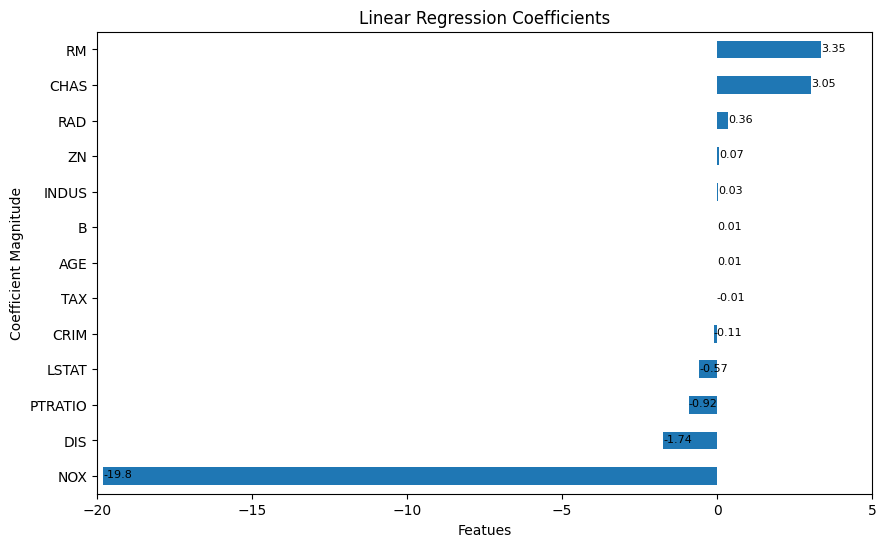

In [36]:
coef = pd.Series(lr.coef_, index=boston_df.columns[:-1])
coef_sorted = coef.sort_values(ascending=True)

# 회귀계수 시각화
plt.figure(figsize=(10, 6))
ax = coef_sorted.plot(kind='barh')
plt.title('Linear Regression Coefficients')
plt.xlabel('Featues')
plt.ylabel('Coefficient Magnitude')
plt.xlim(-20, 5)

for i in ax.patches:
    plt.text(i.get_width(), i.get_y() + 0.2, str(round(i.get_width(), 2)), fontsize=8, color='black')

plt.show()

In [37]:
from sklearn.model_selection import cross_val_score

# cross_val_score()로 5 폴드 세트로 MSE를 구한 뒤, 이를 기반으로 다시 RMSE를 구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print(" 5 folds 의 개별 Negative MSE scores : ", np.round(neg_mse_scores,2))
print(" 5 folds 의 개별 RMSE scores : ", np.round(rmse_scores, 2))
print(" 5 folds 의 평균 RMSE : {0:.3f}".format(avg_rmse))

 5 folds 의 개별 Negative MSE scores :  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829
